### Missing Values- Feature Engineering
##### Lifecycle of a Data Science Projects
     Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
     Feature Engineering---Handling Missing Values
##### Why are their Missing values?? Survey--Depression Survey
     1.They hesitate to put down the information
     2.Survey informations are not that valid
     3.Men--salary
     4.Women---age
     5.People may have died----NAN

##### Data Science Projects---
     Dataset should be collected from multiple sources

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Types of Missing Values
#### 1. Missing Completely at Random (MCAR)
    there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.


In [3]:
df.loc[df['Embarked'].isnull()] # or df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


#### 2. Missing Not at Random (MNAR)
    There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [4]:
df[['Age', 'Cabin']].isnull().sum()

Age      177
Cabin    687
dtype: int64

In [5]:
# Percentage of Null values in the Age
df['Age'].isnull().mean()

0.19865319865319866

In [6]:
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

#### 3. Missing at Random (MAR)
    Men---hide their salary
    Women---hide their age


#### Types of handling missing values - Continuous feature
    1. Mean/ Median/Mode replacement
    2. Random Sample Imputation
    3. Capturing NAN values with a new feature
    4. End of Distribution imputation
    5. Arbitrary imputation

#### 1. Mean/ Median/Mode imputation

In [7]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Cabin'])
df.head()

,Age,Cabin
0,22.0,NaN
1,38.0,C85
2,26.0,NaN
3,35.0,C123
4,35.0,NaN


In [10]:
df.isnull().sum()

Age      177
Cabin    687
dtype: int64

In [11]:
median = df.Age.median()
mean = df.Age.mean()

In [12]:
def Impute_NaN(data, columns, strategy):
    data[columns+'_mean'] = data[columns].fillna(strategy)
Impute_NaN(df, 'Age', mean)

In [13]:
df.head()

,Age,Cabin,Age_mean
0,22.0,NaN,22.0
1,38.0,C85,38.0
2,26.0,NaN,26.0
3,35.0,C123,35.0
4,35.0,NaN,35.0


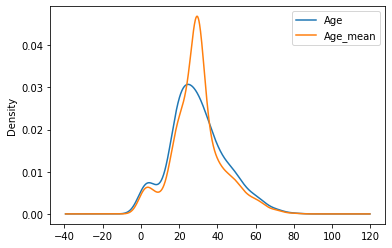

In [14]:
import matplotlib.pyplot as plt
plt.subplot(111)
df['Age'].plot(kind='kde', label='Age')
df['Age_mean'].plot(kind='kde', label='Age_mean')
plt.legend()
plt.show()

#### Advantages:
    1.Easy to implement(Robust to outliers)
    2.Faster way to obtain the complete dataset #### Disadvantages
    3.Change or Distortion in the original variance
    4.Impacts Correlation


### 2. Random Sample Imputation:
    Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
    When should it be used? It assumes that the data are missing completely at random(MCAR)

In [15]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [16]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [17]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [18]:
df['Age'].isnull().sum()

177

In [19]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [21]:
def impute_nan(df,features,strategy):
    df[features+"_median"]=df[features].fillna(median)
    df[features+"_random"]=df[features]
    ##It will have the random sample to fill the na
    random_sample=df[features].dropna().sample(df[features].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[features].isnull()].index
    df.loc[df[features].isnull(),features+'_random']=random_sample

In [22]:
median=df.Age.median()

In [23]:
impute_nan(df,"Age",median)

In [24]:
df.head()

,Age,Fare,Survived,Age_median,Age_random
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

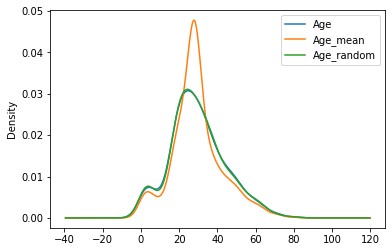

In [27]:
import matplotlib.pyplot as plt
plt.subplot(111)
df['Age'].plot(kind='kde', label='Age')
df['Age_median'].plot(kind='kde', label='Age_mean')
df['Age_random'].plot(kind='kde', label='Age_random')
plt.legend()
plt.show()

#### Advantages:
    1. Easy To implement
    2. There is less distortion in variance

#### Disadvantages:
    Every situation randomness wont work

### 3.Capturing NAN values with a new feature:
    It works well if the data are not missing completely at random

In [28]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [29]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [30]:
df.head()

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


In [31]:
median = df.Age.median()

In [32]:
df['Age'].fillna(median,inplace=True)

In [33]:
df.head()

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


#### Advantages:
    1.Easy to implement
    2.Captures the importance of missing values

#### Disadvantages:
    1.Creating Additional Features(Curse of Dimensionality)

### 4.End of Distribution imputation

In [34]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


<AxesSubplot:>

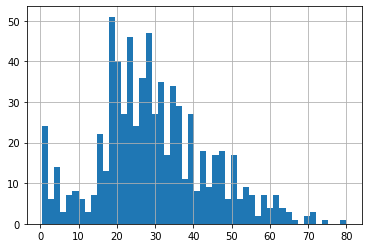

In [35]:
df.Age.hist(bins=50)

In [36]:
extreme=df.Age.mean()+3*df.Age.std()

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

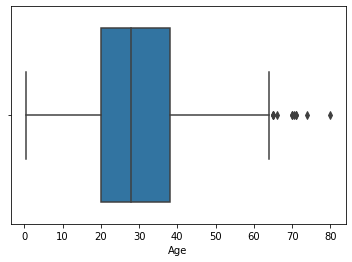

In [37]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [38]:
def impute_nan(df,feature,strategy,extreme):
    df[feature+"_end_distribution"]=df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)

In [39]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [40]:
df.head()

,Age,Fare,Survived,Age_end_distribution
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


<AxesSubplot:>

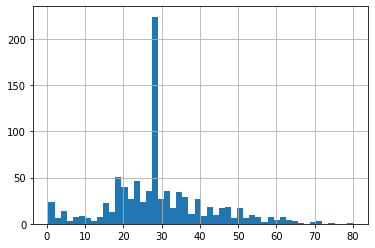

In [41]:
df['Age'].hist(bins=50)

<AxesSubplot:>

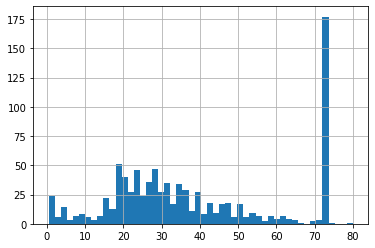

In [42]:
df['Age_end_distribution'].hist(bins=50)

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

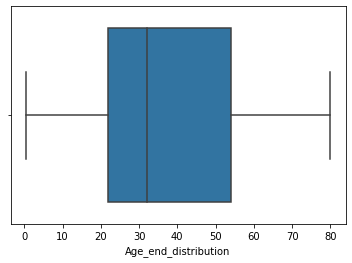

In [43]:
sns.boxplot('Age_end_distribution',data=df)

### 5.Arbitrary imputation